# Transform - Parliamentary Elections Data

## Import libraries

In [105]:
import warnings; warnings.simplefilter('ignore')
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import h5py
import itertools
import os
import pivottablejs as pvt
from tabula import read_pdf, convert_into
import matplotlib.ticker as tic

%matplotlib inline

## Get the file names

In [106]:
# set the right foldername
DATA = './parliamentary/byprovince/extracted_clean/'
MAIN = './'

In [107]:
# check to see files
prov_fns =  [f for f in os.listdir(DATA) if 'PROVINCE.csv' in f]
sum_fns =  [f for f in os.listdir(DATA) if 'Summary' in f and 'v2' in f]

In [108]:
print(prov_fns); print(sum_fns)

['tabula-NATIONAL ASSEMBLY  MASHONALAND EAST PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY  MIDLANDS PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY BULAWAYO PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY HARARE PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MANICALAND PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MASHONALAND CENTRAL PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MASHONALAND WEST PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MASVINGO PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MATABELELAND NORTH PROVINCE.csv', 'tabula-NATIONAL ASSEMBLY MATABELELAND SOUTH PROVINCE.csv']
['tabula-Summary of 2018 results for National Assembly_v2.csv']


In [109]:
len(prov_fns)

10

In [110]:
# voters
presvroll = pd.read_excel("votersroll_bypolstat_clean.xlsx")
print(presvroll.shape)

# results
presres = pd.read_excel("results_bypolstat_clean.xlsx")
print(presres.shape)

(10985, 13)
(10973, 34)


In [111]:
print(presvroll.shape)
presvroll.describe()

(10985, 13)


,ward,tot_count,male_count,male_pct,female_count,female_pct,total_age,mean_age
count,10985.000000,10985.000000,10985.000000,10985.000000,10985.000000,10985.000000,10985.000000,10985.000000
mean,14.320346,518.495312,238.734365,0.458845,279.760947,0.541155,20860.245319,40.951521
std,9.664490,236.305415,117.884138,0.066852,127.287632,0.066852,8960.373867,3.914803
min,1.000000,6.000000,2.000000,0.204082,0.000000,0.000000,212.952772,27.924843
25%,6.000000,325.000000,143.000000,0.416667,179.000000,0.502247,13850.694045,37.601726
50%,13.000000,520.000000,231.000000,0.456250,281.000000,0.543750,21102.918549,40.767391
75%,21.000000,693.000000,323.000000,0.497753,372.000000,0.583333,27436.303901,43.936119
max,46.000000,1000.000000,735.000000,1.000000,658.000000,0.795918,47214.135524,55.519939


In [112]:
presres.shape
presres.describe()

,ward_no,busha_joseph_makamba_freezim_congress,chamisa_nelson_mdc_alliance,chikanga__everisto_washington_rebuild_zimbabwe,dzapasi_melbah_#_1980_freedom_movement_zimbabwe,gava_peter_mapfumo_udf,hlabangana_kwanele_rpz,kasiyamhuru_blessing_zpp,khupe_thokozani_mdc-t,madhuku_lovemore_nca,...,mugadza_willard_tawonezvi_bcp,mujuru_joice_teurai_ropa_prc,munyanduri_tenda_peter_npf,mutinhiri_ambrose_npf,shumba_kuzozvirava_doniel_uda,wilson_peter_harry_dop,total_votes_rejected,ballot_paper_unaccounted_for,total_votes_cast,total_valid_votes_cast
count,10973.000000,10970.000000,10973.000000,10973.000000,10972.000000,10971.000000,10973.000000,10970.000000,10971.000000,10972.000000,...,10971.000000,10970.000000,10970.000000,10971.000000,10972.000000,10970.000000,10969.000000,10658.000000,10973.000000,10973.000000
mean,14.327531,1.597356,195.885446,1.197758,0.172166,0.260961,0.861296,0.640292,4.153860,0.246172,...,0.537599,1.168459,0.413218,0.373257,0.355450,0.446308,6.586106,0.027303,441.356967,434.778092
std,9.664123,1.886528,167.448848,1.548313,0.458642,0.623446,1.289024,1.093437,9.088325,0.692689,...,0.874392,2.945221,0.797587,0.726909,0.724189,0.822959,5.919846,1.550472,201.418622,199.445367
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000
25%,6.000000,0.000000,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,278.000000,272.000000
50%,13.000000,1.000000,139.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,0.000000,443.000000,435.000000
75%,21.000000,2.000000,308.000000,2.000000,0.000000,0.000000,1.000000,1.000000,5.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,0.000000,593.000000,584.000000
max,46.000000,19.000000,725.000000,15.000000,6.000000,23.000000,20.000000,24.000000,264.000000,40.000000,...,11.000000,129.000000,20.000000,11.000000,14.000000,9.000000,65.000000,159.000000,920.000000,912.000000


## Load Data - NCA Winner by Constituency

In [113]:
raw_summary = pd.read_csv(DATA+sum_fns[0])

In [114]:
# Find the demacation for each different table within
raw_summary.iloc[:,0].unique()

array(['SER', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
       '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22',
       '23', '24', '25', '26', '27', '28', '29', '30', '31', '32', '33',
       '34', '35', '36', '37', '38', '39', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '60', '61', '62', '63', '64', '65', '66',
       '67', '68', '69', '70', '71', '72', '73', '74', '75', '76', '77',
       '78', '79', '80', '81', '82', '83', '84', '85', '86', '87', '88',
       '89', '90', '91', '92', '93', '94', '95', '96', '97', '98', '99',
       '100', '101', '102', '103', '104', '105', '106', '107', '108',
       '109', '110', '111', '112', '113', '114', '115', '116', '117',
       '118', '119', '120', '121', '122', '123', '124', '125', '126',
       '127', '128', '129', '130', '131', '132', '133', '134', '135',
       '136', '137', '138', '139', '140', '141', '142', '143', '1

In [115]:
prefixes = ["(A)", "(B)", "(C)", "(D)", "(E)"]
[raw_summary[raw_summary.iloc[:,0].str[:3] == p].index for p in prefixes];

In [116]:
raw_summary =raw_summary.reset_index()                

In [117]:
raw_summary;

In [118]:
# get last row of summary tbl
lastrow = raw_summary[raw_summary.iloc[:,0] == 210].index[0] +1

In [119]:
# get main contents
sumA = raw_summary.iloc[:lastrow,:]
print(sumA.shape)
sumA.head()
sumA.columns = [str(c).strip().lower().replace(" ", "_") for c in sumA.iloc[0,:]]

# drop row, and col
sumA.drop(0, axis=0, inplace=True)
sumA.drop(['ser'], axis=1, inplace=True)
sumA.head()

(211, 7)


,0,province,constituency,winning_candidate,sex,party
1,1,Bulawayo Metropolitan,Bulawayo Central,Watson Nicola Jane,F,MDC- Alliance
2,2,Bulawayo Metropolitan,Bulawayo East,Nyoni Ilos,M,MDC- Alliance
3,3,Bulawayo Metropolitan,Bulawayo South,Modi Rajeshkumar. Indukant,M,ZANU PF
4,4,Bulawayo Metropolitan,Emakhandeni-Entumbane,Tshuma Dingilizwe,M,MDC- Alliance
5,5,Bulawayo Metropolitan,Lobengula,Banda Gift,M,MDC- Alliance


In [120]:
sumA.party.unique()

array(['MDC- Alliance', 'ZANU PF', 'Independent', 'NPF'], dtype=object)

In [121]:
# rename provinces
prov_map= {'Bulawayo Metropolitan':'Bulawayo', 'Harare Metropolitan':'Harare', 'Manicaland': 'Manicaland',
       'Mashonaland Central': 'Mash Central', 'Mashonaland East': 'Mash East', 'Mashonaland West': 'Mash West',
       'Masvingo':'Masvingo', 'Matabeleland North': 'Mat North', 'Matabeleland South':'Mat South', 'Midlands':'Midlands'}
sumA.loc[:, 'province'] = sumA['province'].map(prov_map)

# replace party names
sumA.loc[:, 'party'] = sumA['party'].replace({'Independent':'other', 'NPF':'other'})

In [122]:
# clean up all text
for c in sumA.columns:
    sumA.loc[:,c] = sumA[c].apply(lambda x: str(x).strip().lower())
sumA.head()

,0,province,constituency,winning_candidate,sex,party
1,1,bulawayo,bulawayo central,watson nicola jane,f,mdc- alliance
2,2,bulawayo,bulawayo east,nyoni ilos,m,mdc- alliance
3,3,bulawayo,bulawayo south,modi rajeshkumar. indukant,m,zanu pf
4,4,bulawayo,emakhandeni-entumbane,tshuma dingilizwe,m,mdc- alliance
5,5,bulawayo,lobengula,banda gift,m,mdc- alliance


In [123]:
# Any empty cells?
print(sumA.shape)
sumA.isnull().sum()

(210, 6)


0                    0
province             0
constituency         0
winning_candidate    0
sex                  0
party                0
dtype: int64

In [124]:
sumA.describe()

,0,province,constituency,winning_candidate,sex,party
count,210,210,210,210,210,210
unique,210,10,210,210,2,3
top,103,harare,pelandaba-mpopoma,mpofu mtokozisi manoki,m,zanu pf
freq,1,29,1,1,185,145


In [125]:
#sumA.set_index(['province', 'constituency', 'sex', 'party']).unstack()
sumA = pd.concat([sumA, pd.get_dummies(sumA[['party', 'sex']])], axis=1)

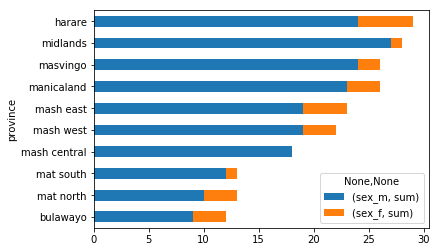

In [126]:
d = sumA.groupby(['province']).agg(['sum','count']).sort_values(by=[('sex_m', 'count')])[[('sex_m', 'sum'), ('sex_f', 'sum')]]
g = d.plot(kind='barh', stacked=True)

In [127]:
sumA.columns

Index(['0', 'province', 'constituency', 'winning_candidate', 'sex', 'party',
       'party_mdc- alliance', 'party_other', 'party_zanu pf', 'sex_f',
       'sex_m'],
      dtype='object')

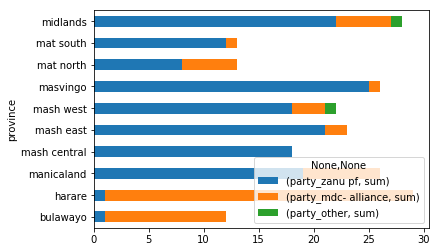

In [128]:
d = sumA.groupby(['province']).agg(['sum'])[[ 'party_zanu pf', 'party_mdc- alliance', 'party_other']]
g = d.plot(kind='barh', stacked=True)

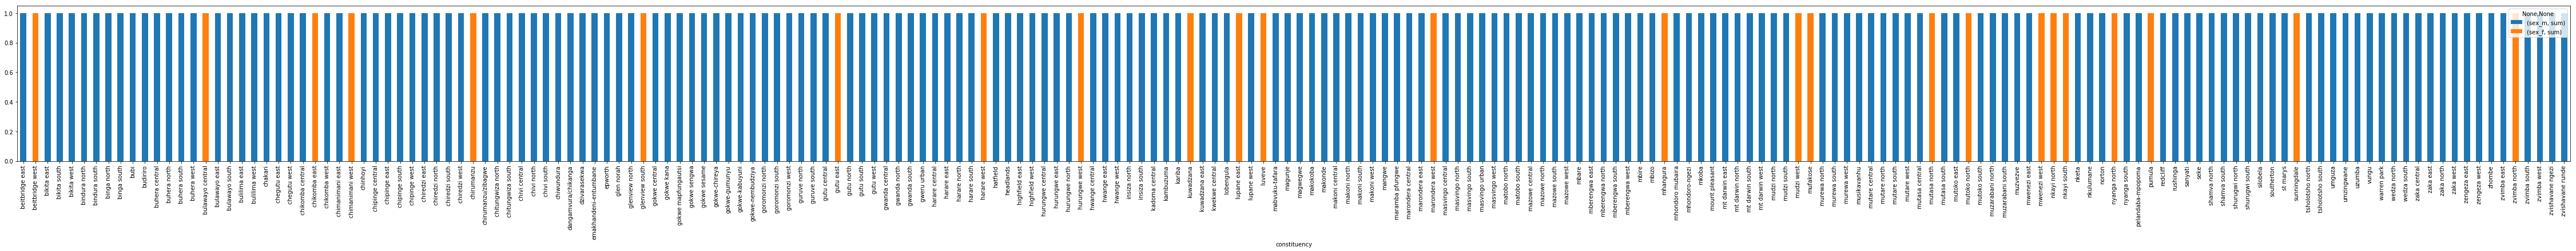

In [129]:
d = sumA.groupby(['constituency']).agg(['sum'])[[('sex_m', 'sum'), ('sex_f', 'sum')]]
g = d.plot(kind='bar', stacked=True, figsize=(80,5))

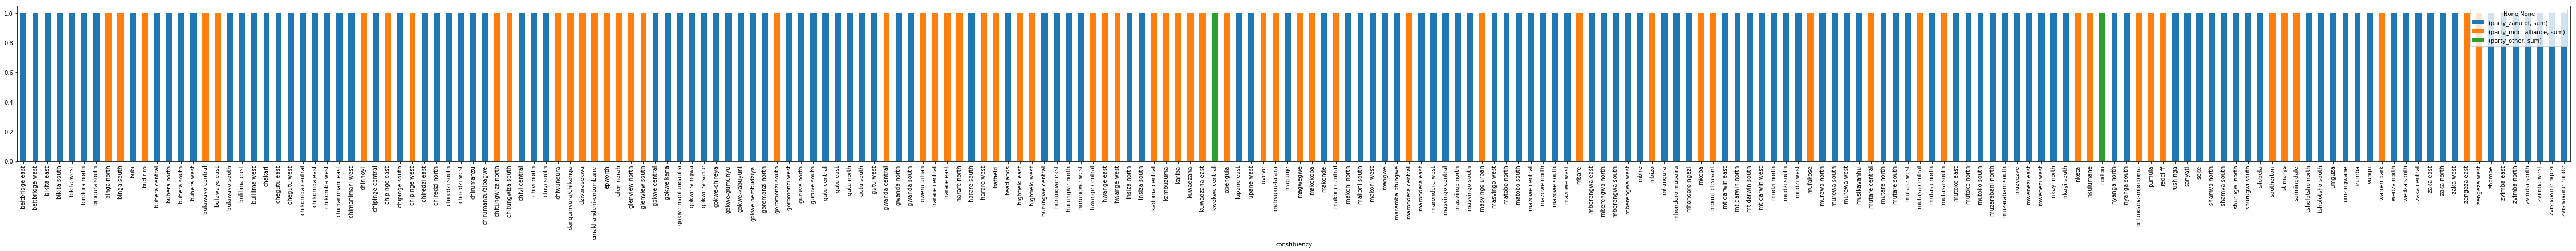

In [130]:
d = sumA.groupby(['constituency']).agg(['sum'])[[ 'party_zanu pf', 'party_mdc- alliance', 'party_other']]
g = d.plot(kind='bar', stacked=True, figsize=(80,5))

In [131]:
sumA.describe()

,party_mdc- alliance,party_other,party_zanu pf,sex_f,sex_m
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.300000,0.009524,0.690476,0.119048,0.880952
std,0.459353,0.097356,0.463402,0.324618,0.324618
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [132]:
sumA.columns

Index(['0', 'province', 'constituency', 'winning_candidate', 'sex', 'party',
       'party_mdc- alliance', 'party_other', 'party_zanu pf', 'sex_f',
       'sex_m'],
      dtype='object')

In [133]:
parwin = sumA[['province', 'constituency', 'winning_candidate', 'sex', 'party',
       'party_mdc- alliance', 'party_other', 'party_zanu pf', 'sex_f',
       'sex_m']].copy()
parwin.head()

,province,constituency,winning_candidate,sex,party,party_mdc- alliance,party_other,party_zanu pf,sex_f,sex_m
1,bulawayo,bulawayo central,watson nicola jane,f,mdc- alliance,1,0,0,1,0
2,bulawayo,bulawayo east,nyoni ilos,m,mdc- alliance,1,0,0,0,1
3,bulawayo,bulawayo south,modi rajeshkumar. indukant,m,zanu pf,0,0,1,0,1
4,bulawayo,emakhandeni-entumbane,tshuma dingilizwe,m,mdc- alliance,1,0,0,0,1
5,bulawayo,lobengula,banda gift,m,mdc- alliance,1,0,0,0,1


## Load Data - NCA Vote Tally by Constituency

In [134]:
mashe, mid, byo = pd.read_csv(DATA+prov_fns[0]), pd.read_csv(DATA+prov_fns[1]), pd.read_csv(DATA+prov_fns[2])
hre, man, mashc = pd.read_csv(DATA+prov_fns[3]),  pd.read_csv(DATA+prov_fns[4]), pd.read_csv(DATA+prov_fns[5])
mashw, mvo, matn = pd.read_csv(DATA+prov_fns[6]),  pd.read_csv(DATA+prov_fns[7]), pd.read_csv(DATA+prov_fns[8])
mats= pd.read_csv(DATA+prov_fns[9])
prov_fns

cols = 'constituency', 'candidate', 'sex', 'party', 'votes'

dfs = dict(zip(['mashe', 'mid', 'byo', 'hre', 'man', 'mashc', 'mashw', 'mvo', 'matn', 'mats'],
         [mashe.iloc[:,:5], mid.iloc[:,:5], byo.iloc[:,:5],hre.iloc[:,:5]
          , man.iloc[:,:5], mashc.iloc[:,:5], mashw.iloc[:,:5], mvo.iloc[:,:5], matn.iloc[:,:5], mats.iloc[:,:5]]))
dnames = ['mashe', 'mid', 'byo', 'hre', 'man', 'mashc', 'mashw', 'mvo', 'matn', 'mats']

In [135]:
for n in dnames:
    print(n, dfs[n].shape)

mashe (257, 5)
mid (338, 5)
byo (255, 5)
hre (469, 5)
man (610, 5)
mashc (193, 5)
mashw (322, 5)
mvo (261, 5)
matn (235, 5)
mats (179, 5)


In [136]:
# rename the columns
for n in dnames:
    dfs[n].columns = cols
    #print(dfs[n].head(1))

In [137]:
for n in dnames:
    print(dfs[n].iloc[3,0])

Constituency
Constituency
BULAWAYO CENTRAL Constituency, the results are
In respect of BUDIRIRO Constituency, the results are as follows:
In respect of BUHERA CENTRAL Constituency, the results are as follows:
In respect of BINDURA NORTH CONSTITUENCY, the results are as
Consituency
In respect of BIKITA EAST constituency, the results are as follows:
nan
Constituency


In [138]:
# combine all the dataframes into one
combo = pd.concat([dfs[n].copy() for n in dnames], axis = 0); combo.head()

,constituency,candidate,sex,party,votes
0,NaN,NaN,NaN,NaN,NaN
1,NaN,In respect of,"Chikomba Central Constituency, the results are...",NaN,NaN
2,NaN,NaN,NaN,NaN,NaN
3,Constituency,Name of Candidate,Sex Party Votes Received,NaN,NaN
4,"Chikomba Central Constituency, the results are...",Chandiwana Ngonidzashe,NaN,NaN,1456


In [139]:
# Reindex First!
combo.index = range(len(combo))

## Combine and Drop Irrelevant Columns

In [140]:
combo.dtypes

constituency    object
candidate       object
sex             object
party           object
votes           object
dtype: object

In [141]:
combo.shape

(3119, 5)

In [142]:
combo.describe()

,constituency,candidate,sex,party,votes
count,2468,2343,1884,1841,1885
unique,211,1899,54,176,1075
top,Constituency,Name of Candidate,M,ZANU PF,Votes Received
freq,185,131,1380,144,69


In [143]:
# clean up text, later
for c in combo.columns:
    combo.loc[:, c]= combo[c].apply(lambda x: str(x).strip().lower())

In [144]:
combo.head()

,constituency,candidate,sex,party,votes
0,nan,nan,nan,nan,nan
1,nan,in respect of,"chikomba central constituency, the results are...",nan,nan
2,nan,nan,nan,nan,nan
3,constituency,name of candidate,sex party votes received,nan,nan
4,"chikomba central constituency, the results are...",chandiwana ngonidzashe,nan,nan,1456


In [145]:
combo.head(2)=='nan'

,constituency,candidate,sex,party,votes
0,True,True,True,True,True
1,True,False,False,True,True


In [146]:
combo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3119 entries, 0 to 3118
Data columns (total 5 columns):
constituency    3119 non-null object
candidate       3119 non-null object
sex             3119 non-null object
party           3119 non-null object
votes           3119 non-null object
dtypes: object(5)
memory usage: 121.9+ KB


In [147]:
nulls_all = (combo['constituency']=='nan') & (combo['candidate']=='nan') \
& (combo['sex']=='nan') & (combo['party']=='nan') & (combo['votes']=='nan'  )
nulls_all_idx = combo[nulls_all].index
combo[nulls_all].shape

(190, 5)

In [148]:
# Filter out the columns with all null
print(combo.shape)
combo = combo.drop(nulls_all_idx, axis=0).copy()
print(combo.shape)

(3119, 5)
(2929, 5)


In [149]:
nulls_const = combo.constituency=='nan'
nulls_const_idx = combo[nulls_const].index
combo[nulls_const].to_excel("parly_clean_constituency_null.xlsx")
combo[nulls_const].shape

(461, 5)

In [150]:
# Filter out the columns with null constituency
print(combo.shape)
combo = combo.drop(nulls_const_idx, axis=0).copy()
print(combo.shape)

(2929, 5)
(2468, 5)


In [151]:
only_const = (combo['constituency']!='nan') & (combo['candidate']=='nan') \
& (combo['sex']=='nan') & (combo['party']=='nan') & (combo['votes']=='nan'  )
only_const_idx = combo[only_const].index
combo[only_const].to_excel("parly_clean_allbutconst_null.xlsx")
combo[only_const].shape

(376, 5)

In [152]:
# Filter out the columns with ONLY constituency
print(combo.shape)
combo = combo.drop(only_const_idx, axis=0).copy()
print(combo.shape)

(2468, 5)
(2092, 5)


In [153]:
combo.isnull().sum()

constituency    0
candidate       0
sex             0
party           0
votes           0
dtype: int64

In [154]:
combo.describe()

,constituency,candidate,sex,party,votes
count,2092,2092,2092,2092,2092
unique,210,1751,8,141,1056
top,constituency,name of candidate,m,nan,nan
freq,185,187,1380,277,341


In [155]:
combo.to_excel('parly_clean_round1.xlsx')

In [156]:
old_colnames = (combo['constituency']=='constituency') | (combo['constituency']=='consituency') \
                | (combo['constituency']=='results of poll') | (combo['votes']=='results of poll') \
    | (combo['party']=='results of poll') | (combo['candidate']=='results of poll') \
    | (combo['sex']=='results of poll') | (combo['sex']=='sex')
old_colnames_idx = combo[old_colnames].index
combo[old_colnames].to_excel("parly_clean_oldcolumnnames.xlsx")

In [157]:
# Filter out the columns with all null
print(combo.shape)
combo = combo.drop(old_colnames_idx, axis=0).copy()
print(combo.shape)

(2092, 5)
(1800, 5)


In [158]:
combo.to_excel('parly_clean_round2.xlsx')

In [159]:
chk = ['kariba', 'sanyati', 'mwenezi east', 'zaka north', 'gwanda south', 'chikomba']
parwin[(parwin['constituency']=='kariba' ) | 
        (parwin['constituency']== 'sanyati') | 
        (parwin['constituency']== 'mwenezi east') |
        (parwin['constituency']=='zaka north') | 
        (parwin['constituency']== 'gwanda south') |
               (parwin['constituency']== 'chikomba central') |
               (parwin['constituency']== 'muzarabani south') |
               (parwin['constituency']== 'marondera west') |
               (parwin['constituency']== 'mutoko south') |
               (parwin['constituency']== 'chiredzi east') ];

### Clean up constituency

In [160]:
# Use 'of' keyword to locate constituency
unresolved = combo.copy()
print(unresolved.constituency.str.find('of').value_counts())

of_idx = unresolved[unresolved.constituency.str.find('of') > 0].index

unresolved = unresolved.drop(of_idx, axis=0); unresolved.shape

 11    1335
-1      465
Name: constituency, dtype: int64


(465, 5)

In [161]:
# Use 'constituency' keyword to locate constituency
print(unresolved.constituency.str.find('constituency').value_counts())

constituency_idx = unresolved[unresolved.constituency.str.find('constituency') > 0].index

unresolved = unresolved.drop(constituency_idx, axis=0); unresolved.shape

 15    88
 13    71
 17    59
 14    49
 12    41
 16    36
 18    35
-1     31
 27    19
 5     13
 10    12
 7      8
 11     3
Name: constituency, dtype: int64


(31, 5)

In [162]:
# Use 'national' keyword to locate constituency
print(unresolved.constituency.str.find('national').value_counts())

national_idx = unresolved[unresolved.constituency.str.find('national') > 0].index

unresolved = unresolved.drop(national_idx, axis=0); unresolved.shape

14    18
17     9
15     4
Name: constituency, dtype: int64


(0, 5)

In [163]:
unresolved.shape

(0, 5)

In [164]:
# Check exclusivity of indexes
print(len(of_idx) + len(constituency_idx) + len(national_idx),combo.shape)

1800 (1800, 5)


## Back to Excel, Clean up then Load again!

In [165]:
combo.to_excel("parly_clean_roundX_penultimate.xlsx")

## Read back in the cleaned data

In [166]:
votes_raw = pd.read_excel("parly_clean_roundX_penultimate_reload.xlsx"); votes_raw.shape

(1800, 16)

In [167]:
votes_raw.columns

Index(['constituency', 'candidate', 'sex', 'party', 'votes', 'Unnamed: 5',
       'is_na', 'start', 'end', 'const1', 'const2', 'constituency_final',
       'candidate_final', 'sex_final', 'party_final', 'votes_final'],
      dtype='object')

In [168]:
votes_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1800 entries, 4 to 3118
Data columns (total 16 columns):
constituency          1800 non-null object
candidate             1753 non-null object
sex                   1626 non-null object
party                 1667 non-null object
votes                 1626 non-null object
Unnamed: 5            0 non-null float64
is_na                 1800 non-null int64
start                 1800 non-null int64
end                   1800 non-null int64
const1                1800 non-null object
const2                1800 non-null object
constituency_final    1800 non-null object
candidate_final       1800 non-null object
sex_final             1800 non-null object
party_final           1800 non-null object
votes_final           1800 non-null object
dtypes: float64(1), int64(3), object(12)
memory usage: 239.1+ KB


In [169]:
votes_raw = votes_raw[['constituency_final','candidate_final', 'sex_final', 'party_final', 'votes_final']]
votes_raw.columns = ['constituency','candidate', 'sex', 'party', 'votes']

In [170]:
votes_raw = votes_raw[['constituency', 'candidate', 'sex', 'party', 'votes']]

## Clean Up some more

In [171]:
# find where there are zeros 
zeros= (votes_raw['candidate']==0) & (votes_raw['sex']==0) & (votes_raw['party']==0)
zeros_idx = votes_raw[zeros].index
zeros.sum()

174

In [172]:
# drop zeros
print(votes_raw.shape)
votes_raw.drop(zeros_idx, axis=0, inplace=True)
print(votes_raw.shape)

(1800, 5)
(1626, 5)


In [173]:
# clean up all columns
def removeNanVal(l):
    try:
        r=" ".join([str(w).strip().lower() for w in l if w!='nan'])
    except:
        r = str(l).strip().lower()
    return r
removeNanVal(['nan', 'jk     ', ' bBh'])

'jk bbh'

In [174]:
# remove the 'nan'
for c in votes_raw.columns:
    votes_raw.loc[:, c] = votes_raw[c].str.split().apply(lambda x : removeNanVal(x))
    
# change the votes columns to numerical
votes_raw.loc[:, 'votes'] = pd.to_numeric(votes_raw['votes'].str.replace(" ",""))

In [175]:
votes_raw['votes'].value_counts()

81       12
77        8
75        8
79        8
127       7
128       7
166       7
71        7
76        7
49        6
93        6
92        6
160       6
60        6
176       6
102       6
172       6
67        6
69        6
151       6
165       6
122       6
104       6
113       6
142       6
28        5
56        5
84        5
116       5
168       5
         ..
1080      1
9212      1
35893     1
1075      1
3119      1
13358     1
17451     1
6962      1
4409      1
1062      1
1060      1
7203      1
19488     1
15390     1
10357     1
7195      1
9241      1
1048      1
9087      1
13330     1
24271     1
1037      1
9228      1
9227      1
1033      1
3080      1
3079      1
1029      1
15276     1
10932     1
Name: votes, dtype: int64

In [176]:
votes_raw.isnull().sum()

constituency    0
candidate       0
sex             0
party           0
votes           0
dtype: int64

In [177]:
votes_raw.describe()

,votes
count,1626.000000
mean,2886.009840
std,5167.629776
min,0.000000
25%,132.000000
50%,340.500000
75%,3140.750000
max,35893.000000


In [178]:
votes_raw[['constituency', 'candidate', 'sex', 'party']].describe()

,constituency,candidate,sex,party
count,1626,1626,1626,1626
unique,208,1624,2,109
top,magwegwe,moyo khumbulani,m,independent
freq,23,2,1380,229


In [179]:
votes_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 4 to 3118
Data columns (total 5 columns):
constituency    1626 non-null object
candidate       1626 non-null object
sex             1626 non-null object
party           1626 non-null object
votes           1626 non-null int64
dtypes: int64(1), object(4)
memory usage: 76.2+ KB


In [180]:
parres = votes_raw.copy(); parres.shape

(1626, 5)

## Check the constituencies

In [181]:
print("Constituencies in parly winner data",len(set(parwin.constituency)),"\n"
      "Constituencies in parly votes data", len(set(parres.constituency)))

Constituencies in parly winner data 210 
Constituencies in parly votes data 208


In [182]:
set(parwin.constituency)-set(parres.constituency)

{'bikita south',
 'chirumanzu/zibagwe',
 'chiwundura',
 'dzivarasekwa',
 'emakhandeni-entumbane',
 'glenview north',
 'glenview south',
 'gokwe-chireya',
 'gokwe-gumunyu',
 'gokwe-kabuyuni',
 'gokwe-nembudziya',
 'mabvuku-tafara',
 'mhondoro-ngezi',
 'mount pleasant',
 'mt darwin east',
 'mt darwin north',
 'mt darwin south',
 'mt darwin west',
 'mudzi north',
 'mudzi south',
 'st marys'}

In [183]:
set(parres.constituency)-set(parwin.constituency)

{'bikita sout',
 'chirumanzu zibagwe',
 'chiundura',
 'dzivaresekwa',
 'emakhandeni/entumban',
 'glen view north',
 'glen view south',
 'gokwe chireya',
 'gokwe gumunyu',
 'gokwe kabuyuni',
 'gokwe nembudziya',
 'mabvuku tafara',
 'mhondoro - ngezi',
 'mount darwin east',
 'mount darwin north',
 'mount darwin south',
 'mount darwin west',
 'mt pleasant',
 'st mary’s'}

In [184]:
# Apply map to rename constituencies - from parly_clean_missingconstituencies.xlsx
const_map = { 'chirumanzu/zibagwe': 'chirumanzu-zibagwe',
 'mount pleasant': 'mt pleasant',
 'bikita sout':'bikita south',
 'chirumanzu zibagwe': 'chirumanzu-zibagwe',
 'chiundura': 'chiwundura',
 'dzivaresekwa':'dzivarasekwa',
 'emakhandeni/entumban': 'emakhandeni-entumbane',
 'glen view north': 'glenview north',
 'glen view south': 'glenview south',
 'gokwe chireya': 'gokwe-chireya',
 'gokwe gumunyu': 'gokwe-gumunyu',
 'gokwe kabuyuni': 'gokwe-kabuyuni',
 'gokwe nembudziya': 'gokwe-nembudziya',
 'mabvuku tafara': 'mabvuku-tafara',
 'mhondoro - ngezi': 'mhondoro-ngezi',
 'mount darwin east': 'mt darwin east',
 'mount darwin north': 'mt darwin north',
 'mount darwin south': 'mt darwin south',
 'mount darwin west': 'mt darwin west',
'st marys':"st mary’s",
 'zvishavane runde':'zvishavane-runde'
}

parwin.loc[:, 'constituency'] = parwin.loc[:, 'constituency'].replace(const_map)
parres.loc[:, 'constituency'] =parres.loc[:, 'constituency'].replace(const_map)

In [185]:
# Change votes from string to number, if not already. check
parres.sum()

constituency    chikomba centralchikomba centralchikomba centr...
candidate       chandiwana ngonidzashe shiridenga pinielmhona ...
sex             mmmmmmmmfmfmmmmmmmmmmfmmmmmmfmmffmffmmmmmmmmmm...
party           independentmdc-alliancezanu pfbuild zimbabwe a...
votes                                                     4692652
dtype: object

In [186]:
# Get provinces
parres =pd.merge(parres, parwin, how="left", left_on="constituency", right_on="constituency")[[
    'province','constituency', 'candidate','sex_x',  'party_x','votes'] ]
parres.columns = ['province','constituency', 'candidate','sex',  'party','votes']

In [187]:
# Show whats still missing in each
missingW =  set(parres.constituency)-set(parwin.constituency)
missingR= set(parwin.constituency)-set(parres.constituency)
print("Missing from Constituency winners data", missingW)
print("Missing from Constituency votes data", missingR)
#Mash East

Missing from Constituency winners data set()
Missing from Constituency votes data {'mudzi north', 'mudzi south'}


### Keep checking - Mudzi South and Mudzi North Missing from released Mash East pdf provincial results (ZEC website)

In [188]:
parres.drop('votes', axis=1).describe()

,province,constituency,candidate,sex,party
count,1626,1626,1626,1626,1626
unique,10,208,1624,2,109
top,harare,magwegwe,moyo khumbulani,m,independent
freq,317,23,2,1380,229


In [189]:
parres.head()

,province,constituency,candidate,sex,party,votes
0,mash east,chikomba central,chandiwana ngonidzashe shiri,m,independent,1456
1,mash east,chikomba central,denga piniel,m,mdc-alliance,4537
2,mash east,chikomba central,mhona felix tapiwa,m,zanu pf,7543
3,mash east,chikomba central,mugaduyi situta,m,build zimbabwe alliance,93
4,mash east,chikomba central,mugova eddington,m,united democracy movement,70


In [190]:
#parres[parres.candidate.duplicated(keep=False)].sort_values(by='candidate')

parres[['constituency', 'candidate']].duplicated().sum()

0

In [191]:
parres[['constituency', 'candidate', 'party']].duplicated().sum()

0

In [192]:
parres['sex'].unique()

array(['m', 'f'], dtype=object)

In [193]:
parres[parres['sex']=='m sex']

,province,constituency,candidate,sex,party,votes


In [194]:
inR = set(parres.party); inW=set(parres.party)

In [195]:
inW

{'# 1980 chinhu chedu',
 '# 1980 freedom movement zimbabwe',
 'alliance',
 'ansa',
 'apa',
 'apc',
 'build zim alliance',
 'build zimbabwe alliance',
 'bza',
 'coalition democrats',
 'coalition of demo',
 'coalition of democrats',
 'code',
 'cp',
 'da-upp',
 'dop',
 'era',
 'fcz',
 'fdz',
 'fjcz',
 'fmz',
 'forces of liberation organization of african national',
 'free zim congress',
 'free zim congress party',
 'freedom front',
 'freedom movement #1980',
 'freezim congress',
 'freezim congress party',
 'fzc',
 'independent',
 'independent.',
 'maat zim',
 'maat zimbabwe',
 'maat zp',
 'mdc - alliance',
 'mdc - t',
 'mdc -alliance',
 'mdc -t',
 'mdc alliance',
 'mdc t',
 'mdc – alliance',
 'mdc – t',
 'mdc –alliance',
 'mdc –t',
 'mdc- a',
 'mdc- alliance',
 'mdc- t',
 'mdc-alliance',
 'mdc-alliance party',
 'mdc-alliance.',
 'mdc-allianceparty',
 'mdc-t',
 'mdct',
 'mrp',
 'nap',
 'national action party',
 'national patriotic front',
 'nca',
 'ndf',
 'nga',
 'npf',
 'nzrp',
 'pdz',
 "

In [196]:
inW-inR

set()

In [197]:
len(parres['party'].unique())

109

In [198]:
len(inR)

109

In [199]:
# Clean up the party column
party_map = {'independent': 'independent',
 'mdc- alliance': 'mdc-alliance',
 'npf': 'national patriotic front',
 'zanu pf': 'zanu pf',

    '# 1980 chinhu chedu':'# 1980 chinhu chedu',
 '# 1980 freedom movement zimbabwe':'# 1980 chinhu chedu',
 'alliance': 'mdc-alliance',
 'ansa': 'ansa',
 'apa': 'apa',
 'apc': 'apc',
 'build zim alliance': 'build zim alliance',
 'build zimbabwe alliance':	 'build zim alliance',
 'bza': 'build zim alliance',
 'coalition democrats': 'coalition democrats',
 'coalition of demo': 'coalition democrats',
 'coalition of democrats': 'coalition democrats',
 'code': 'coalition democrats',
 'cp':'Chiefs Party',
 'da-upp': 'da-upp',
 'dop': 'dop',
 'era':'era',
 'fcz': '# 1980 freedom movement zimbabwe',
 'fdz':'# 1980 freedom movement zimbabwe',
 'fjcz': '# 1980 freedom movement zimbabwe',
 'fmz':'# 1980 freedom movement zimbabwe',
 'forces of liberation organization of african national': 'forces of liberation organization of african national',
 'free zim congress': 'free zim congress',
 'free zim congress party': 'free zim congress',
 'freedom front':'freedom front',
 'freedom movement #1980': '# 1980 freedom movement zimbabwe',
 'freezim congress': 'free zim congress',
 'freezim congress party': 'free zim congress',
 'fzc': 'free zim congress',
 'independent': 'independent',
 'independent.': 'independent',
 'maat zim': 'maat zimbabwe',
 'maat zimbabwe': 'maat zimbabwe',
 'maat zp': 'maat zimbabwe',
 'mdc - alliance': 'mdc-alliance',
 'mdc - t':'mdc-t',
 'mdc -alliance': 'mdc-alliance',
 'mdc -t':'mdc-t',
 'mdc alliance': 'mdc-alliance',
 'mdc t':'mdc-t',
 'mdc – alliance': 'mdc-alliance',
 'mdc – t':'mdc-t',
 'mdc –alliance': 'mdc-alliance',
 'mdc –t': 'mdc-t',
 'mdc- a':'mdc-alliance',
 'mdc- alliance': 'mdc-alliance',
 'mdc- t':'mdc-t',
 'mdc-alliance':'mdc-alliance',
 'mdc-alliance party': 'mdc-alliance',
 'mdc-alliance.': 'mdc-alliance',
 'mdc-allianceparty': 'mdc-alliance',
 'mdc-t': 'mdc-t',
 'mdct': 'mdc-t',
 'mrp': 'mrp',
 'nap':'national action party',
 'national action party': 'national action party',
 'national patriotic front': 'national patriotic front',
 'nca': 'nca',
 'ndf': 'ndf',
 'nga': 'nga',
 'npf': 'national patriotic front',
 'nzrp': 'nzrp',
 'pdz':'pdz',
 "people's rainbow coalition": "people's rainbow coalition",
 'peoples’ rainbow coalition': "people's rainbow coalition",
 'people’s rainbow coalition':"people's rainbow coalition",
 'people’s rainbow coalition party.': "people's rainbow coalition",
 'people’s rainbow coalition.': "people's rainbow coalition",
 'ppp':"People's Progressive Party",
 'pppz':"People's Progressive Party",
 'prc': "people's rainbow coalition",
 'prz':"people's rainbow coalition",
 'rainbow coalition (prc)': "people's rainbow coalition",
 'rpz': 'rpz',
 'rzp':'rzp',
 'suvoz': 'suvoz',
 'tad': 'tad',
 'uanc': 'united african national council',
 'uca':'uca',
 'ucadpz': 'ucadpz',
 'uda': 'uda',
 'udf': 'udf',
 'udm': 'udm',
 'umd': 'umd',
 'united african national council': 'united african national council',
 'united african national council.': 'united african national council',
 'united democracy movement': 'united democracy movement',
 'united democratic alliance': 'united democratic alliance',
 'united party zimbabwe': 'united party zimbabwe',
 'upz': 'united party zimbabwe',
 'zanu':'zanu pf',
 "zanu (pf) people's": 'zanu pf',
 'zanu pf': 'zanu pf',
 'zanu pf mdc': 'zanu pf',
 'zanu pf received': 'zanu pf',
 'zanu- pf': 'zanu pf',
 'zanu-pf': 'zanu pf',
 'zapu': 'zapu',
 'zdu': 'zdu',
 'zim first':'zim first',
 'zimbabwe african people’s union': 'zanu pf',
 'zimbabwe labour party':'zimbabwe labour party',
 'zimbabwe partnership for prosperity': 'zimbabwe partnership for prosperity',
 'zimbabwe partnership for prosperity.': 'zimbabwe partnership for prosperity',
 'zimfirst': 'zimfirst',
 'zipp': 'zipp',
 'zpm': 'zpm',
 'zpp:gpm': 'zpp:gpm',
 'zrdp': 'zrdp'}

In [200]:
 party2_map = {'independent':  'other',
 'mdc- alliance':  'mdc-alliance',
 'npf':  'other',
 'zanu pf':  'zanu pf',
'# 1980 chinhu chedu': 'other',
 '# 1980 freedom movement zimbabwe': 'other',
 'alliance': 'other',
 'ansa': 'other',
 'apa': 'other',
 'apc': 'other',
 'build zim alliance': 'other',
 'build zimbabwe alliance': 'other',
 'bza': 'other',
 'coalition democrats': 'other',
 'coalition of demo': 'other',
 'coalition of democrats': 'other',
 'code': 'other',
 'cp': 'other',
 'da-upp': 'other',
 'dop': 'other',
 'era': 'other',
 'fcz': 'other',
 'fdz': 'other',
 'fjcz': 'other',
 'fmz': 'other',
 'forces of liberation organization of african national': 'other',
 'free zim congress': 'other',
 'free zim congress party': 'other',
 'freedom front': 'other',
 'freedom movement #1980': 'other',
 'freezim congress': 'other',
 'freezim congress party': 'other',
 'fzc': 'other',
 'independent':  'other',
 'independent.': 'other',
 'maat zim': 'other',
 'maat zimbabwe': 'other',
 'maat zp': 'other',
 'mdc - alliance':  'mdc-alliance',
 'mdc - t': 'other',
 'mdc -alliance':  'mdc-alliance',
 'mdc -t': 'other',
 'mdc alliance':  'mdc-alliance',
 'mdc t': 'other',
 'mdc – alliance':  'mdc-alliance',
 'mdc – t': 'other',
 'mdc –alliance':  'mdc-alliance',
 'mdc –t': 'other',
 'mdc- a':  'mdc-alliance',
 'mdc- alliance':  'mdc-alliance',
 'mdc- t': 'other',
 'mdc-alliance':  'mdc-alliance',
 'mdc-alliance party':  'mdc-alliance',
 'mdc-alliance.':  'mdc-alliance',
 'mdc-allianceparty':  'mdc-alliance',
 'mdc-t': 'other',
 'mdct': 'other',
 'mrp': 'other',
 'nap': 'other',
 'national action party': 'other',
 'national patriotic front':  'other',
 'nca': 'other',
 'ndf': 'other',
 'nga': 'other',
 'npf':  'other',
 'nzrp': 'other',
 'pdz': 'other',
 "people's rainbow coalition": 'other',
 'peoples’ rainbow coalition': 'other',
 'people’s rainbow coalition': 'other',
 'people’s rainbow coalition party.': 'other',
 'people’s rainbow coalition.': 'other',
 'ppp': 'other',
 'pppz': 'other',
 'prc': 'other',
 'prz': 'other',
 'rainbow coalition (prc)': 'other',
 'rpz': 'other',
 'rzp': 'other',
 'suvoz': 'other',
 'tad': 'other',
 'uanc': 'other',
 'uca': 'other',
 'ucadpz': 'other',
 'uda': 'other',
 'udf': 'other',
 'udm': 'other',
 'umd': 'other',
 'united african national council': 'other',
 'united african national council.': 'other',
 'united democracy movement': 'other',
 'united democratic alliance': 'other',
 'united party zimbabwe': 'other',
 'upz': 'other',
 'zanu':  'zanu pf',
 "zanu (pf) people's":  'zanu pf',
 'zanu pf':  'zanu pf',
 'zanu pf mdc':  'zanu pf',
 'zanu pf received':  'zanu pf',
 'zanu- pf':  'zanu pf',
 'zanu-pf':  'zanu pf',
 'zapu': 'other',
 'zdu': 'other',
 'zim first': 'other',
 'zimbabwe african people’s union':  'zanu pf',
 'zimbabwe labour party': 'other',
 'zimbabwe partnership for prosperity': 'other',
 'zimbabwe partnership for prosperity.': 'other',
 'zimfirst': 'other',
 'zipp': 'other',
 'zpm': 'other',
 'zpp:gpm': 'other',
 'zrdp': 'other'}


In [201]:
parres['party1'] = parres.loc[:,'party'].replace(party_map)
parres['party2'] = parres.loc[:,'party'].replace(party2_map)

parwin['party1'] = parwin.loc[:,'party'].replace(party_map)

In [202]:
print(len(set(parres.party)), len(set(parres.party1)), len(set(parres.party2)), len(set(parwin.party)))

109 53 3 3


In [203]:
set(parres.party2)

{'mdc-alliance', 'other', 'zanu pf'}

In [204]:
parres.party1.unique()

array(['independent', 'mdc-alliance', 'zanu pf', 'build zim alliance',
       'united democracy movement', "people's rainbow coalition",
       'zimbabwe partnership for prosperity', 'mdc-t',
       'zimbabwe labour party', 'united african national council', 'nca',
       'coalition democrats', 'free zim congress', 'zapu',
       'national patriotic front',
       'forces of liberation organization of african national', 'apa',
       'zipp', 'zdu', 'uda', 'udf', '# 1980 freedom movement zimbabwe',
       'tad', 'suvoz', 'mrp', 'zpm', 'umd', "People's Progressive Party",
       'zrdp', 'zim first', 'uca', 'dop', 'rpz', 'era', 'maat zimbabwe',
       'freedom front', 'udm', 'united party zimbabwe', 'da-upp',
       '# 1980 chinhu chedu', 'Chiefs Party', 'apc', 'zimfirst', 'ucadpz',
       'ndf', 'nzrp', 'rzp', 'nga', 'pdz', 'united democratic alliance',
       'national action party', 'ansa', 'zpp:gpm'], dtype=object)

In [205]:
parres[parres.party=='nan']

,province,constituency,candidate,sex,party,votes,party1,party2


In [206]:
parwin.describe()

,party_mdc- alliance,party_other,party_zanu pf,sex_f,sex_m
count,210.000000,210.000000,210.000000,210.000000,210.000000
mean,0.300000,0.009524,0.690476,0.119048,0.880952
std,0.459353,0.097356,0.463402,0.324618,0.324618
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,1.000000
50%,0.000000,0.000000,1.000000,0.000000,1.000000
75%,1.000000,0.000000,1.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [207]:
parres.drop('votes', axis=1).describe()

,province,constituency,candidate,sex,party,party1,party2
count,1626,1626,1626,1626,1626,1626,1626
unique,10,208,1624,2,109,53,3
top,harare,magwegwe,moyo khumbulani,m,independent,independent,other
freq,317,23,2,1380,229,238,1200


## Make sure to save all results for the analysis files

In [208]:
# saving
parwin.to_excel("zimvotersroll2018_parly_bymps.xlsx")
parres.to_excel("zimvotersroll2018_parly_byvotes.xlsx")

## THE END of PREP - See Analysis file for further details
-------------------------------